# **Image Identification**

---

# Data Exploration

In [1]:
import os
import shutil
from pathlib import Path

Create main folder

In [2]:
Path('/kaggle/working/images').mkdir(parents=True, exist_ok=True)

create food class folder

In [3]:
Path('/kaggle/working/images/food').mkdir(parents=True, exist_ok=True)

create medical imaging class folder

In [4]:
Path('/kaggle/working/images/medical').mkdir(parents=True, exist_ok=True)

create other objects class folder

In [5]:
Path('/kaggle/working/images/other').mkdir(parents=True, exist_ok=True)

---

Copy from Food 101 dataset

In [6]:
path = "/kaggle/input/food-101/food-101/food-101/images/"
s = os.listdir(path)

In [7]:
s.sort()
s = s[1:]

In [8]:
len(s)

101

In [9]:
for i in range(len(s)):
    images = os.listdir(f"/kaggle/input/food-101/food-101/food-101/images/{s[i]}")
    for j in range(10):
        shutil.copy(f"/kaggle/input/food-101/food-101/food-101/images/{s[i]}/{images[j]}", "/kaggle/working/images/food")

---

Copy from Image Net dataset

In [10]:
path = "/kaggle/input/imagenetmini-1000/imagenet-mini/val"
s = os.listdir(path)

In [11]:
s.sort()

In [12]:
len(s)

1000

In [13]:
for i in range(len(s)):
    images = os.listdir(f"{path}/{s[i]}")
    for j in range(len(images)):
        shutil.copy(f"{path}/{s[i]}/{images[j]}", "/kaggle/working/images/other/")

---

Copy from Medical Imaging Scan dataset

In [14]:
path = "/kaggle/input/medical-imaging-scan-type-classification"
s = os.listdir(path)

In [15]:
s.sort()

In [16]:
len(s)

4

In [17]:
for i in range(len(s)):
    images = os.listdir(f"{path}/{s[i]}")
    for j in range(400):
        shutil.copy(f"{path}/{s[i]}/{images[j]}", "/kaggle/working/images/medical/")

---

In [18]:
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [19]:
import keras
keras.__version__

2024-08-20 16:31:07.305252: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 16:31:07.305350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 16:31:07.473341: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'2.15.0'

importing libraries

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

# Loading Final Version Data

### Classes

Class 0 -> Food

Class 1 -> Medical Imaging

Class 2 -> Other

In [21]:
classes = {0:"Food",
           1:"Medical Imaging Scan",
           2:"Other Unsupported Image!"}

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_data = train_datagen.flow_from_directory('/kaggle/working/images',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/kaggle/working/images',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False,
                                              subset='validation')

Found 5554 images belonging to 3 classes.
Found 979 images belonging to 3 classes.


In [23]:
train_data.image_shape

(224, 224, 3)

In [24]:
np.unique(test_data.labels)

array([0, 1, 2], dtype=int32)

In [25]:
train_data.class_indices

{'food': 0, 'medical': 1, 'other': 2}

# Modeling

In [26]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [27]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 12291     
                                                                 
Total params: 134272835 (512.21 MB)
Trainable params: 11

## Train

In [29]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

results = model.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
                  )

Epoch 1/50


I0000 00:00:1724171493.394106     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


174/174 [==============================] - 55s 243ms/step - loss: 0.9810 - accuracy: 0.8851 - val_loss: 0.5091 - val_accuracy: 0.8100
Epoch 2/50
174/174 [==============================] - 31s 180ms/step - loss: 0.1084 - accuracy: 0.9573 - val_loss: 0.5570 - val_accuracy: 0.8427
Epoch 3/50
174/174 [==============================] - 34s 194ms/step - loss: 0.0857 - accuracy: 0.9689 - val_loss: 0.2553 - val_accuracy: 0.9224
Epoch 4/50
174/174 [==============================] - 35s 199ms/step - loss: 0.0453 - accuracy: 0.9838 - val_loss: 0.2783 - val_accuracy: 0.9356
Epoch 5/50
174/174 [==============================] - 33s 189ms/step - loss: 0.0330 - accuracy: 0.9887 - val_loss: 0.2968 - val_accuracy: 0.9265
Epoch 6/50
174/174 [==============================] - 34s 193ms/step - loss: 0.0271 - accuracy: 0.9888 - val_loss: 0.4483 - val_accuracy: 0.9132
Epoch 7/50
174/174 [==============================] - 33s 192ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.4055 - val_accuracy: 0.9

## Retraining

In [30]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

results2 = model.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
                  )

Epoch 1/50
174/174 [==============================] - 36s 200ms/step - loss: 0.0464 - accuracy: 0.9845 - val_loss: 0.3368 - val_accuracy: 0.9356
Epoch 2/50
174/174 [==============================] - 33s 192ms/step - loss: 0.0684 - accuracy: 0.9818 - val_loss: 0.3866 - val_accuracy: 0.9244
Epoch 3/50
174/174 [==============================] - 34s 193ms/step - loss: 0.0256 - accuracy: 0.9932 - val_loss: 0.4779 - val_accuracy: 0.9173
Epoch 4/50
174/174 [==============================] - 34s 194ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.4578 - val_accuracy: 0.9377
Epoch 5/50
174/174 [==============================] - 33s 190ms/step - loss: 0.0175 - accuracy: 0.9924 - val_loss: 0.5672 - val_accuracy: 0.9305
Epoch 6/50
174/174 [==============================] - 34s 192ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.6314 - val_accuracy: 0.9162
Epoch 7/50
174/174 [==============================] - 33s 190ms/step - loss: 0.0079 - accuracy: 0.9978 - val_loss: 0.6019 - val_ac

In [31]:
train_loss, train_acc = model.evaluate(train_data)

174/174 [==============================] - 25s 142ms/step - loss: 0.0051 - accuracy: 0.9975


In [32]:
print("Training Values")
print('Train accuracy = ',round(train_acc*100,2),'%\nLoss = ',train_loss ,sep='')

Training Values
Train accuracy = 99.75%
Loss = 0.005097215995192528


In [33]:
loss, acc = model.evaluate(test_data)

31/31 [==============================] - 5s 143ms/step - loss: 0.4578 - accuracy: 0.9377


In [34]:
print("Testing Values")
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,sep='')

Testing Values
Test accuracy = 93.77%
Loss = 0.4577670097351074


In [35]:
results.history['val_loss'] + results2.history['val_loss']

[0.5091122984886169,
 0.5569772124290466,
 0.2552848756313324,
 0.2782902717590332,
 0.2968183159828186,
 0.44828757643699646,
 0.4055050015449524,
 0.42650485038757324,
 0.619754433631897,
 0.33677759766578674,
 0.3866080343723297,
 0.47789478302001953,
 0.4577670097351074,
 0.5671917200088501,
 0.6314185261726379,
 0.6018633246421814,
 0.5741255283355713,
 0.4672727882862091]

In [36]:
results.history['val_accuracy'] + results2.history['val_accuracy']

[0.8100101947784424,
 0.8426966071128845,
 0.9223697781562805,
 0.9356486201286316,
 0.926455557346344,
 0.9131767153739929,
 0.9182839393615723,
 0.932584285736084,
 0.9305413961410522,
 0.9356486201286316,
 0.9244126677513123,
 0.9172624945640564,
 0.9376915097236633,
 0.9305413961410522,
 0.9162410497665405,
 0.9274770021438599,
 0.9050050973892212,
 0.9366700649261475]

In [37]:
i = results2.history['val_loss'].index(loss)
i

3

In [38]:
results2.history['val_accuracy'][i]

0.9376915097236633

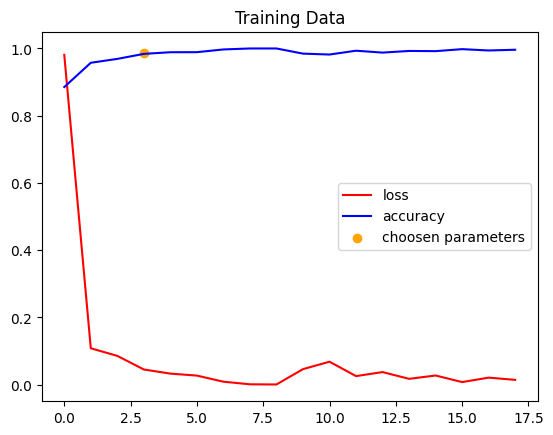

In [39]:
fig = plt.figure()
plt.plot(results.history['loss'] + results2.history['loss'], c='red', label='loss')
plt.plot(results.history['accuracy'] + results2.history['accuracy'], c='blue', label='accuracy')
plt.scatter(i ,results2.history['accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Training Data")
plt.legend(loc="center right")
plt.show()

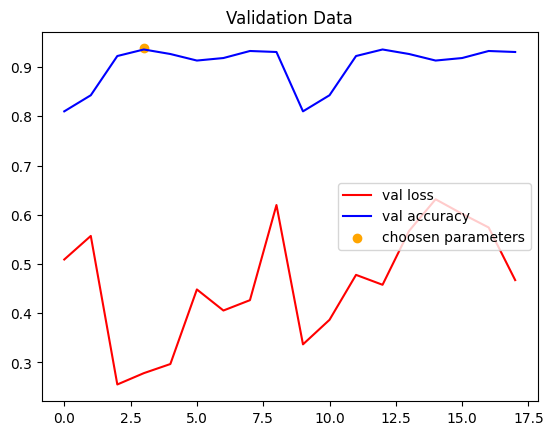

In [40]:
fig = plt.figure()
plt.plot(results.history['val_loss']+results2.history['val_loss'], c='red', label='val loss')
plt.plot(results.history['val_accuracy']+results.history['val_accuracy'], c='blue', label='val accuracy')
plt.scatter(i ,results2.history['val_accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Validation Data")
plt.legend(loc="center right")
plt.show()

In [41]:
yp = model.predict(test_data)
yp

31/31 [==============================] - 5s 144ms/step


array([[9.9779248e-01, 8.3891578e-08, 2.2073463e-03],
       [2.1573209e-05, 1.8878329e-06, 9.9997652e-01],
       [9.9998677e-01, 6.3589869e-11, 1.3263656e-05],
       ...,
       [1.1584077e-03, 1.7126498e-06, 9.9883991e-01],
       [1.9250056e-01, 9.5644835e-05, 8.0740380e-01],
       [6.9865418e-06, 4.4228691e-06, 9.9998856e-01]], dtype=float32)

In [42]:
yp = yp.argmax(axis=1)
yp

array([0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,

In [43]:
yp.shape

(979,)

# Random Sampling Prediction

In [44]:
from random import randint
path = "/kaggle/working/images/food"
s = os.listdir(path)
f1 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
f2 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
f3 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))

path = "/kaggle/working/images/medical"
s = os.listdir(path)
m1 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
m2 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
m3 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))

path = "/kaggle/working/images/other"
s = os.listdir(path)
o1 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
o2 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))
o3 = load_img(f'{path}/{s[randint(0,len(s))]}',target_size=(224,224))

Text(0.5, 1.0, 'Other')

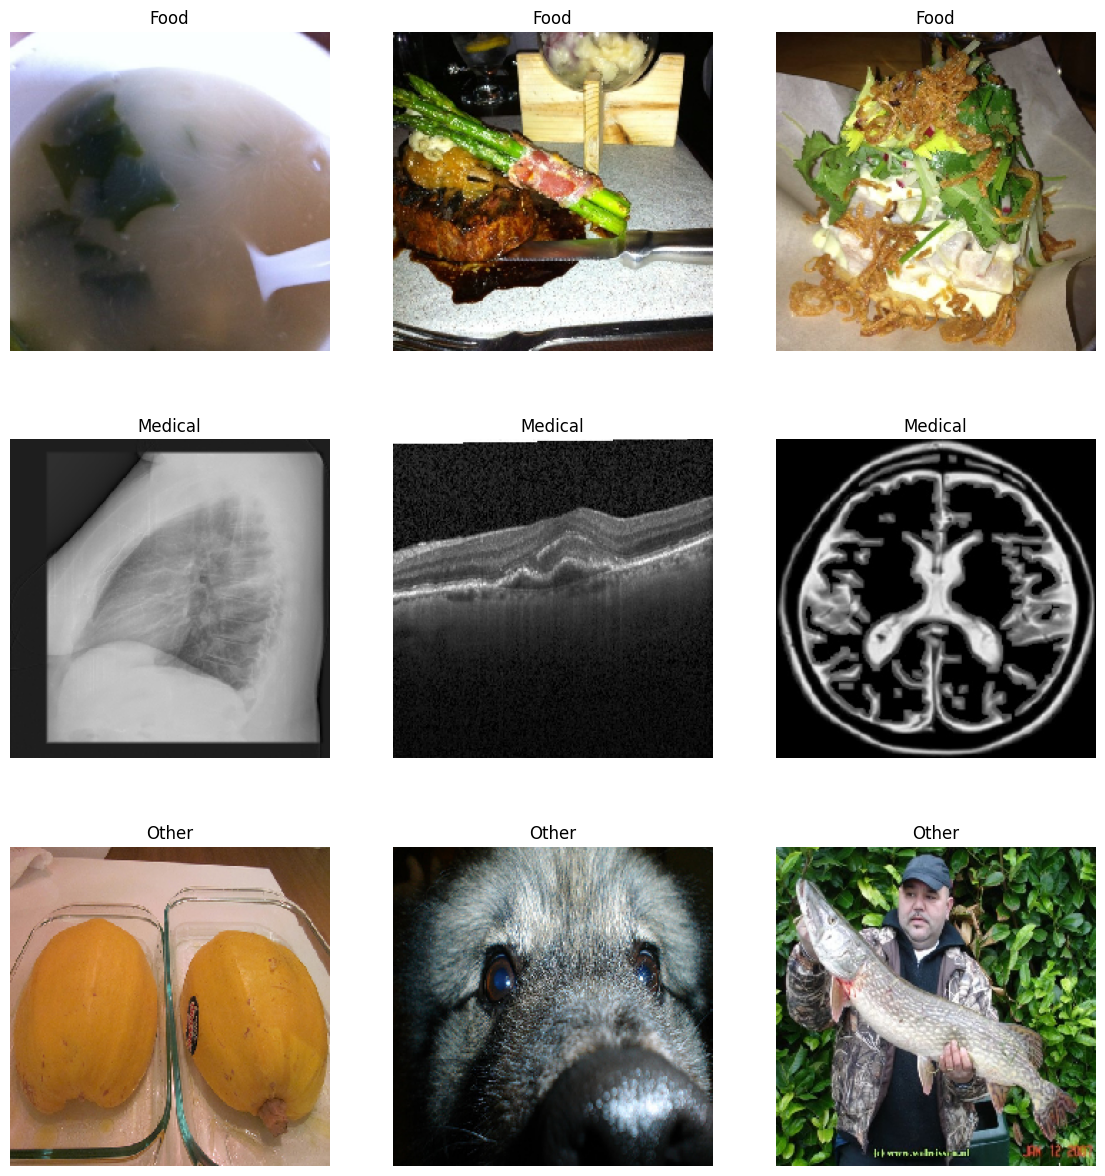

In [45]:
fig = plt.figure(figsize=(14,15))
# plt.grid=False
fig.add_subplot(3, 3, 1)
plt.axis('off')
plt.imshow(f1)
plt.title('Food')
# _______________________________
fig.add_subplot(3, 3, 2)
plt.axis('off')
plt.imshow(f2)
plt.title('Food')
# _______________________________
fig.add_subplot(3, 3, 3)
plt.axis('off')
plt.imshow(f3)
plt.title('Food')
# _______________________________
fig.add_subplot(3, 3, 4)
plt.axis('off')
plt.imshow(m1)
plt.title('Medical')
# _______________________________
fig.add_subplot(3, 3, 5)
plt.axis('off')
plt.imshow(m2)
plt.title('Medical')
# _______________________________
fig.add_subplot(3, 3, 6)
plt.axis('off')
plt.imshow(m3)
plt.title('Medical')
# _______________________________
fig.add_subplot(3, 3, 7)
plt.axis('off')
plt.imshow(o1)
plt.title('Other')
# _______________________________
fig.add_subplot(3, 3, 8)
plt.axis('off')
plt.imshow(o2)
plt.title('Other')
# _______________________________
fig.add_subplot(3, 3, 9)
plt.axis('off')
plt.imshow(o3)
plt.title('Other')

In [46]:
f1 = img_to_array(f1)
f2 = img_to_array(f2)
f3 = img_to_array(f3)

m1 = img_to_array(m1)
m2 = img_to_array(m2)
m3 = img_to_array(m3)

o1 = img_to_array(o1)
o2 = img_to_array(o2)
o3 = img_to_array(o3)

f1 = f1/255
f2 = f2/255
f3 = f3/255

m1 = m1/255
m2 = m2/255
m3 = m3/255

o1 = o1/255
o2 = o2/255
o3 = o3/255

f1 = f1.reshape(1,224,224,3)
f2 = f2.reshape(1,224,224,3)
f3 = f3.reshape(1,224,224,3)

m1 = m1.reshape(1,224,224,3)
m2 = m2.reshape(1,224,224,3)
m3 = m3.reshape(1,224,224,3)

o1 = o1.reshape(1,224,224,3)
o2 = o2.reshape(1,224,224,3)
o3 = o3.reshape(1,224,224,3)

f1.shape

(1, 224, 224, 3)

In [47]:
p1 = model.predict(f1).argmax()
print("Actual: Food")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 1s 1s/step
Actual: Food
Predicted: Class 0: Food


In [48]:
p1 = model.predict(f2).argmax()
print("Actual: Food")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 19ms/step
Actual: Food
Predicted: Class 0: Food


In [49]:
p1 = model.predict(f3).argmax()
print("Actual: Food")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Food
Predicted: Class 0: Food


In [50]:
p1 = model.predict(m1).argmax()
print("Actual: Medical")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Medical
Predicted: Class 1: Medical Imaging Scan


In [51]:
p1 = model.predict(m2).argmax()
print("Actual: Medical")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Medical
Predicted: Class 1: Medical Imaging Scan


In [52]:
p1 = model.predict(m3).argmax()
print("Actual: Medical")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 19ms/step
Actual: Medical
Predicted: Class 1: Medical Imaging Scan


In [53]:
p1 = model.predict(o1).argmax()
print("Actual: Other")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Other
Predicted: Class 2: Other Unsupported Image!


In [54]:
p1 = model.predict(o2).argmax()
print("Actual: Other")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Other
Predicted: Class 2: Other Unsupported Image!


In [55]:
p1 = model.predict(o3).argmax()
print("Actual: Other")
print("Predicted:"," Class ",p1,": ",classes[p1],sep='')

1/1 [==============================] - 0s 18ms/step
Actual: Other
Predicted: Class 2: Other Unsupported Image!


In [56]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,food/1002160.jpg,0,0
1,food/1003804.jpg,0,2
2,food/1009028.jpg,0,0
3,food/1016491.jpg,0,0
4,food/1018015.jpg,0,0
...,...,...,...
974,other/ILSVRC2012_val_00007212.JPEG,2,2
975,other/ILSVRC2012_val_00007221.JPEG,2,2
976,other/ILSVRC2012_val_00007240.JPEG,2,2
977,other/ILSVRC2012_val_00007249.JPEG,2,2


In [57]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Heatmap

In [58]:
m = confusion_matrix(test_data.labels,yp)
m

array([[120,   0,  31],
       [  3, 231,   6],
       [ 16,   5, 567]])

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

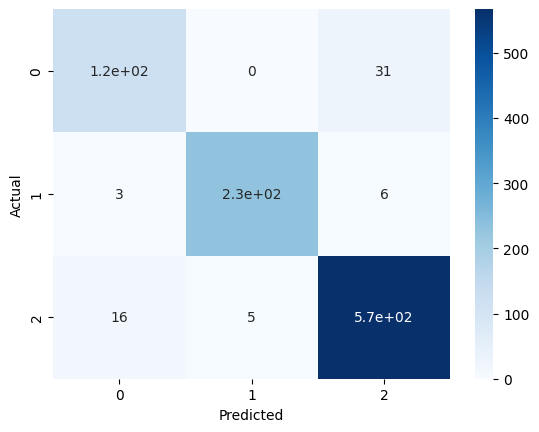

In [59]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m,annot=True, cmap='Blues')

---

In [60]:
model.save("model_identify_image.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'model_identify_image.h5')

/kaggle/working


/kaggle/working/model_identify_image.h5